In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# df = pd.read_csv("./all_props.csv")

In [28]:
df = pd.read_csv('all_props.csv')

X = df.drop(columns=['results_per_li','results_per_total','Symbol',])

Y_total = df['results_per_total']
Y_li = df['results_per_li']

In [29]:
# Adding sqrt values for each column
for col in X.columns:
    # Make sure the column is numeric before applying sqrt
    if pd.api.types.is_numeric_dtype(X[col]):
        X[f'{col}_sqrt'] = np.sqrt(abs(X[col]))
        X[f'{col}_squared'] = np.square(X[col])


In [30]:
from sklearn.ensemble import ExtraTreesRegressor

In [31]:
model = ExtraTreesRegressor()
model.fit(X, Y_total)

ExtraTreesRegressor()

In [32]:
model.feature_importances_

array([0.02378679, 0.03050022, 0.09880845, 0.02681177, 0.03017219,
       0.04734214, 0.05000219, 0.0255001 , 0.03356975, 0.03556279,
       0.03778273, 0.13210032, 0.08944743, 0.03874045, 0.02841976,
       0.03136921, 0.01619811, 0.04912668, 0.0645496 , 0.06222383,
       0.04798549])

In [33]:
df.iloc[:,2:].columns

Index(['AtomicRadius', 'Electronegativity', 'IonizationEnergy',
       'ElectronAffinity', 'Polarizability', 'results_per_total',
       'results_per_li', 'LiSites'],
      dtype='object')

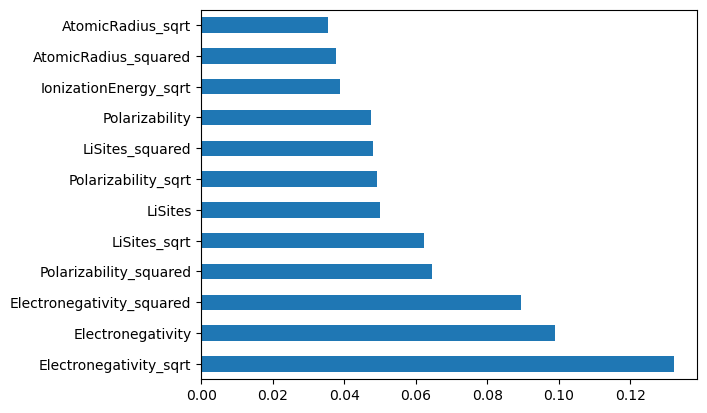

In [34]:
# plot the feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()